In [191]:
from __future__ import print_function
import torch

In [192]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.1704e-41],
        [0.0000e+00, 2.2369e+08, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [       nan,        nan, 3.2733e-26]])


In [193]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6861, 0.5660, 0.6635],
        [0.9618, 0.0476, 0.4848],
        [0.7894, 0.7408, 0.5036],
        [0.1987, 0.8990, 0.8536],
        [0.1882, 0.4307, 0.3341]])


# Linear Regression

https://medium.com/biaslyai/pytorch-linear-and-logistic-regression-models-5c5f0da2cb9

In [ ]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
x_data = Variable(torch.Tensor([[10.0], [9.0], [3.0], [2.0]]))
y_data = Variable(torch.Tensor([[90.0], [80.0], [50.0], [30.0]]))

In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
model = LinearRegression()

In [ ]:
criterion = torch.nn.MSELoss(size_average=False)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
for epoch in range(20):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_data)
    # Compute Loss
    loss = criterion(y_pred, y_data)
    # Backward pass
    loss.backward()
#     print(loss)
    optimizer.step()

In [ ]:
new_x = Variable(torch.Tensor([[4.0]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred.data[0][0])

In [ ]:
model(x_data)

# Logistic Regression

In [194]:
class LogisticRegression(torch.nn.Module):
     def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
     def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegression()

In [195]:
criterion = torch.nn.BCELoss(size_average=True)

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


https://www.kaggle.com/uciml/iris/downloads/Iris.csv/2

In [196]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import pandas as pd
import random

# Importing the dataset
df = pd.read_csv('Iris.csv')

# Dropping index
df = df.drop(['Id'], axis=1)

# Encoding class labels
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['Species']))}
df['Species'] = df['Species'].map(class_mapping)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


/Users/lilianaester/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Final gradient descend: [Parameter containing:
tensor([[0.9272, 1.0167]], requires_grad=True), Parameter containing:
tensor([-0.1738], requires_grad=True)]


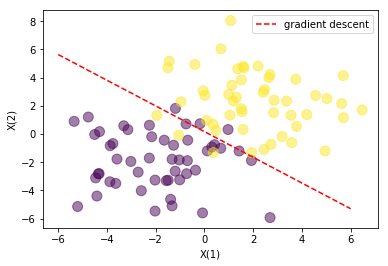

In [198]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable

N = 100
D = 2

X = np.random.randn(N,D)*2

# center the first N/2 points at (-2,-2)
X[:int(N/2),:] = X[:int(N/2),:] - 2*np.ones((int(N/2),D))

# center the last N/2 points at (2, 2)
X[int(N/2):,:] = X[int(N/2):,:] + 2*np.ones((int(N/2),D))

# labels: first N/2 are 0, last N/2 are 1
T = np.array([0]*int(N/2) + [1]*int(N/2)).reshape(100,1)

x_data = Variable(torch.Tensor(X))
y_data = Variable(torch.Tensor(T))

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1) # 2 in and 1 out
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
# Our model    
model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)
    
    # Compute and print loss
    loss = criterion(y_pred, y_data)
#     print(epoch, loss.item())
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# for f in model.parameters():
#     print('data is')
#     print(f.data)
#     print(f.grad)

w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

import matplotlib.pyplot as plt

print("Final gradient descend:", w)
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T.reshape(N), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='gradient descent')
plt.legend(handles=[line_up])
plt.xlabel('X(1)')
plt.ylabel('X(2)')
plt.show()


In [115]:
res = model(x_data)
res = res.detach().numpy()


/Users/lilianaester/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy :  0.96


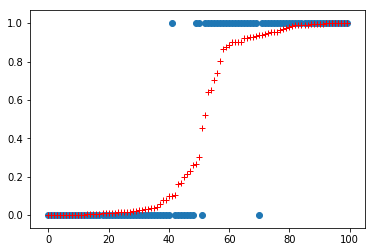

In [199]:
x_res1 = [] 
x_res2 = [] 
x_idx = [] 


y_res = y_data.detach().numpy()
for idx in range(len(res)):
    x_res1.append([res[idx][0], y_res[idx][0]])
    x_idx.append(idx)

new_res = sorted(x_res1,key=lambda l:l[0])
x1 = []
x2 = []
count_diff = 0
for i in new_res:
    if(i[0] < 0.5):
        if (i[1] != 0):
            count_diff = count_diff + 1
    else :
        if (i[1] != 1):
            count_diff = count_diff + 1
    x1.append(i[0])
    x2.append(i[1])
    
plt.plot(x1,'r+')
plt.scatter(x_idx,x2,)
print("Accuracy : ",(len(x1) - count_diff)/len(x1))
# plt.scatter(new_res,x_idx)
# plt.scatter(x_res3,x_res1)
# plt.scatter(x_res3,x_res2)
# plt.scatter(x_res[1], x_res[2])



In [159]:
x_ress

[0.0, 0.25849897]

In [48]:


# Spliting dataset into train and test
df = df.as_matrix()
np.random.shuffle(df)

X = df[:,:-1]
y = df[:,-1]

train_len = int(0.8 * len(y))
print(train_len)
test_len = int(len(y) - train_len)

X_train = X[:train_len]
y_train = y[:train_len]

X_test = X[-test_len:]
y_test = y[-test_len:]

# Defining the network
class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = F.relu(self.input_linear(x))
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred

D_in, H, D_out = 4, 20, 3
lr = 0.01
model = DynamicNet(4, 20, 3)

if torch.cuda.is_available():
    print('CUDA Available')
    model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Trainning the model
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    if torch.cuda.is_available():
        x = Variable(torch.Tensor(X_train).cuda())
        y = Variable(torch.Tensor(y_train).cuda())
    else:
        x = Variable(torch.Tensor(X_train).float())
        y = Variable(torch.Tensor(y_train).long())    

    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch) % 100 == 0:
        print('Epoch [%d/%d] Loss: %.4f' %(epoch + 1, num_epochs, loss.item()))
        
# Getting the predictions and the accuracy score
if torch.cuda.is_available():
    x = Variable(torch.Tensor(X_test).cuda())
    y = torch.Tensor(y_test).long()
else:
    x = Variable(torch.Tensor(X_test).float())
    y = torch.Tensor(y_test).long()

out = model(x)
_, predicted = torch.max(out.data, 1)

print('Accuracy of the network %d %%' % (100 * torch.sum(y==predicted) / len(y_test)))

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


120
Epoch [1/2000] Loss: 1.0909
Epoch [101/2000] Loss: 0.3294
Epoch [201/2000] Loss: 0.0607
Epoch [301/2000] Loss: 0.0576
Epoch [401/2000] Loss: 0.0597
Epoch [501/2000] Loss: 0.0944
Epoch [601/2000] Loss: 0.0539
Epoch [701/2000] Loss: 0.0493
Epoch [801/2000] Loss: 0.0481
Epoch [901/2000] Loss: 0.0677
Epoch [1001/2000] Loss: 0.0724
Epoch [1101/2000] Loss: 0.1458
Epoch [1201/2000] Loss: 0.0576
Epoch [1301/2000] Loss: 0.0502
Epoch [1401/2000] Loss: 0.0535
Epoch [1501/2000] Loss: 0.0576
Epoch [1601/2000] Loss: 0.0459
Epoch [1701/2000] Loss: 0.0510
Epoch [1801/2000] Loss: 0.0516
Epoch [1901/2000] Loss: 0.0505
Accuracy of the network 96 %


# Linear Regression
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [ ]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [ ]:
plt.show()

# Multi Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

#input_size = 1
input_size = 3
output_size = 1
num_epochs = 300
learning_rate = 0.002

#Data set
# x_train = np.array([[1.564],[2.11],[3.3],[5.4]], dtype=np.float32)
x_train = np.array([[73.,80.,75.],[93.,88.,93.],[89.,91.,90.],[96.,98.,100.],[73.,63.,70.]],dtype=np.float32)
# y_train = np.array([[8.0],[19.0],[25.0],[34.45]], dtype= np.float32)
y_train = np.array([[152.],[185.],[180.],[196.],[142.]],dtype=np.float32)
print('x_train:\n',x_train)
print('y_train:\n',y_train)

class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,output_size)

    def forward(self,x):
        out = self.linear(x) #Forward propogation 
        return out

model = LinearRegression(input_size,output_size)

#Lost and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

#train the Model
for epoch in range(num_epochs):
    #convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train)) #convert numpy array to torch tensor
    #inputs = Variable(torch.Tensor(x_train))    
    targets = Variable(torch.from_numpy(y_train)) #convert numpy array to torch tensor

    #forward+ backward + optimize
    optimizer.zero_grad() #gradient
    outputs = model(inputs) #output
    loss = criterion(outputs,targets) #loss function
    loss.backward() #backward propogation
    optimizer.step() #1-step optimization(gradeint descent)

    if(epoch+1) %5 ==0:
        print('epoch [%d/%d], Loss: %.4f' %(epoch +1, num_epochs, loss.item()))
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
        plt.plot(x_train,y_train,'ro',label='Original Data')
        plt.plot(x_train,predicted,label='Fitted Line')
        plt.legend()
        plt.show()

# Kaggle Linear Regression
https://www.kaggle.com/aakashns/pytorch-basics-linear-regression-from-scratch

In [ ]:
import numpy as np
import torch

# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

In [ ]:
y = w * x + b
print(y)

In [ ]:
y.backward()

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')


In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

In [ ]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

In [ ]:
# Define the model
def model(x):
    return x @ w.t() + b

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

In [ ]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [ ]:
print(preds)
print(targets)

In [19]:
import numpy as np
import torch.nn as nn
import torch
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

#Define Data Loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5103, -0.0997,  0.4349],
        [-0.4630, -0.1468, -0.2895]], requires_grad=True)
Parameter containing:
tensor([-0.1936,  0.3845], requires_grad=True)


In [25]:
inputs[0]

tensor([73., 67., 43.])

In [21]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [22]:
import torch.nn.functional as F
loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(19349.3281, grad_fn=<MseLossBackward>)


In [23]:
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1,num_epochs, loss))
    print('Training loss: ', loss_fn(model(inputs), targets))

In [24]:
fit(1000, model, loss_fn, opt)

Training loss:  tensor(0.6036, grad_fn=<MseLossBackward>)


In [8]:
preds = model(inputs)
preds

tensor([[ 57.0923,  70.2893],
        [ 82.2571, 100.3949],
        [118.6482, 133.5857],
        [ 21.0624,  37.1969],
        [101.9498, 118.4945],
        [ 57.0923,  70.2893],
        [ 82.2571, 100.3949],
        [118.6482, 133.5857],
        [ 21.0624,  37.1969],
        [101.9498, 118.4945],
        [ 57.0923,  70.2893],
        [ 82.2571, 100.3949],
        [118.6482, 133.5857],
        [ 21.0624,  37.1969],
        [101.9498, 118.4945]], grad_fn=<AddmmBackward>)

In [9]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])